In [1]:
!rm -r G.A.I_MISCELLANEUS_RESOURCES mnist_data
!git clone https://github.com/Q-b1t/G.A.I_MISCELLANEUS_RESOURCES.git
!mkdir bbc_dataset
!cp /content/G.A.I_MISCELLANEUS_RESOURCES/bbc_text_cls/bbc_text_cls.csv bbc_dataset

rm: cannot remove 'mnist_data': No such file or directory
Cloning into 'G.A.I_MISCELLANEUS_RESOURCES'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 82 (delta 12), reused 73 (delta 6), pack-reused 0
Receiving objects: 100% (82/82), 20.05 MiB | 38.59 MiB/s, done.
Resolving deltas: 100% (12/12), done.
mkdir: cannot create directory ‘bbc_dataset’: File exists


In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [3]:
# import and visualize the data
df = pd.read_csv("/content/bbc_dataset/bbc_text_cls.csv")
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [4]:
len(df)

2225

In [5]:
# retrieve the inputs and labels from the dataset
inputs, labels = df['text'], df['labels']

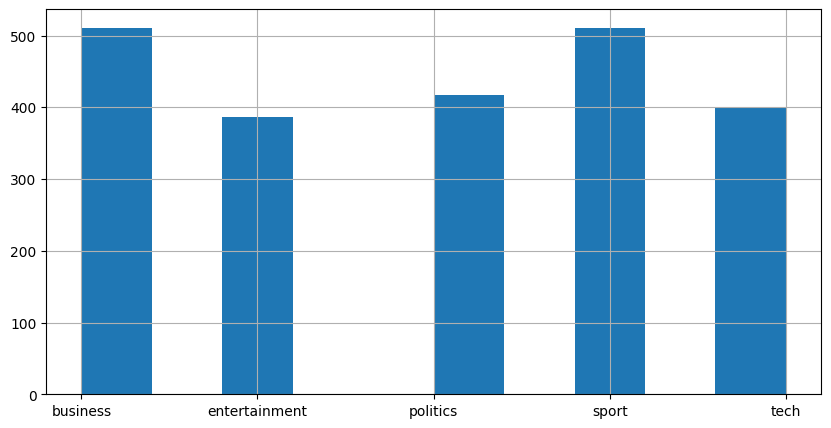

In [6]:
# assess how balanced is the dataset in cuestion
labels.hist(figsize=(10, 5));

The data is mostly ok regarding the class balance.

In [7]:
# perform the data train test split
input_train, input_test, y_train, y_test = train_test_split(inputs, labels, random_state=1337)
input_train.shape, input_test.shape, y_train.shape, y_test.shape

((1668,), (557,), (1668,), (557,))

In [8]:
# instance a count vectorizer
vectorizer = CountVectorizer()

In [9]:
# fit the dataset
X_train = vectorizer.fit_transform(input_train)
X_test = vectorizer.transform(input_test)

In [10]:
X_train

<1668x25962 sparse matrix of type '<class 'numpy.int64'>'
	with 334688 stored elements in Compressed Sparse Row format>

This is sparse matrix type because most of the data in the count vectorizer are zero due to the bast dictionary. This is with the purpose of saving memory space.

In [11]:
# see the percentage of non zero data in the train dataset
(X_train != 0).sum() / np.prod(X_train.shape) # prod -> N X D = number_of_data (literally the area of the triangle)

0.007728691093808568

In [12]:
model = MultinomialNB()
model.fit(
    X_train,
    y_train
)

print(f"[~] train acc: {model.score(X_train, y_train)}")
print(f"[~] test acc: {model.score(X_test, y_test)}")

[~] train acc: 0.9934052757793765
[~] test acc: 0.9766606822262118


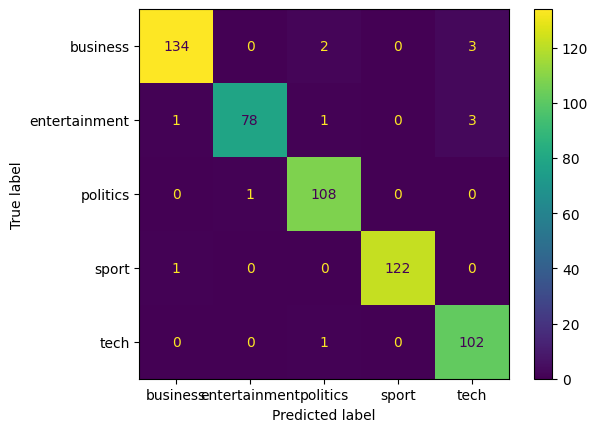

In [13]:
prediction_test = model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,prediction_test)

The model is surprisingly accurate. Almost all the data are in the diagonal. The only pertinent missclasiffied labels are:
- Business and Entertainment
- Business and Tech
- Politics and Business

In [17]:
# missclassification examples
misclassified_idx = np.where(prediction_test != y_test)[0]
i = np.random.choice(misclassified_idx)
print(f"[*] True class: {y_test.iloc[i]}")
print(f"[-] Predicted class: {prediction_test[i]}")
input_test.iloc[i]

[*] True class: entertainment
[-] Predicted class: tech


'Ethnic producers \'face barriers\'\n\nMinority ethnic led (Mel) production companies face barriers in succeeding in the film and television industries, research has suggested.\n\nThe study, commissioned by Pact and the UK Film Council, included interviews with industry experts and individuals. They indicated that career progression and a lack of role models are among the main problems within such companies. The research indicated that about 10% of independent production companies in the UK are minority ethnic led.\n\nA minority ethnic led company is defined as one in which the majority of decision-making power rests with an individual or individuals from a minority ethnic group. The report also explored the problems faced by such companies when attempting to compete within the film and TV industries. It said they are often smaller than other companies and lack the resources, so are often squeezed out of the market by bigger firms. The research recommended that minority ethnic led comp

In [18]:
# see which features matter
model.feature_log_prob_.shape

(5, 25962)

In [19]:
# vocabulary dictionary
model.classes_

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype='<U13')

In [20]:
# get the reverse vocabulary
idx_2_word = vectorizer.get_feature_names_out()

In [24]:
classes = list(set(labels))
classes

['entertainment', 'business', 'sport', 'tech', 'politics']

In [27]:
n = 10
for i in range(5): # top n words per class
  idx = np.argsort(-model.feature_log_prob_[i])[:n]
  print(f"[~] Top {n} classes in class {classes[i]}:")
  print(idx_2_word[idx])
  print("_"*60)

[~] Top 10 classes in class entertainment:
['the' 'to' 'of' 'in' 'and' 'said' 'for' 'that' 'is' 'it']
____________________________________________________________
[~] Top 10 classes in class business:
['the' 'and' 'of' 'to' 'in' 'for' 'on' 'was' 'is' 'it']
____________________________________________________________
[~] Top 10 classes in class sport:
['the' 'to' 'of' 'and' 'in' 'he' 'said' 'for' 'that' 'is']
____________________________________________________________
[~] Top 10 classes in class tech:
['the' 'to' 'and' 'in' 'of' 'he' 'for' 'is' 'it' 'on']
____________________________________________________________
[~] Top 10 classes in class politics:
['the' 'to' 'of' 'and' 'in' 'that' 'is' 'it' 'for' 'on']
____________________________________________________________
